### Scrape Table from [Website](http://www.planecrashinfo.com/accidents.htm)

Website: http://www.planecrashinfo.com/accidents.htm  

Scraping Tutorial: https://www.geeksforgeeks.org/scrape-tables-from-any-website-using-python/

In [1]:
# pip install html-table-parser-python3

Import the necessary libraries

In [2]:
# Library for opening url and creating requests
import urllib.request

# For pretty-printing python data structures
from pprint import pprint

# For parsing all the tables present on the website
from html_table_parser.parser import HTMLTableParser

# For converting the parsed data in a pandas dataframe
import pandas as pd

Define a function go get the contents of the website

In [3]:
# Open a website and read its binary contents (HTTP Response Body)
def url_get_contents(url):

    # Opens a website and read its
    # binary contents (HTTP Response Body)

    #making request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)

    # Read the contents of the website
    return f.read()

Parse tables

In [4]:
# Eefine the HTML contents of a URL.
xhtml = url_get_contents('http://www.planecrashinfo.com/accidents.htm').decode('utf-8')

# Define the HTMLTableParser object
p = HTMLTableParser()

# Feed the HTML contents in the HTMLTableParser object
p.feed(xhtml)

# # Get a look at the extracted table
# pprint(p.tables[0])

In [5]:
# Create dataframe from table, making the top row the column names
accHistDF = pd.DataFrame(p.tables[0][1:], columns = p.tables[0][0])

In [6]:
# A quick look at the data
accHistDF.head()

,AIRLINE,COUNTRY,BEGAN OPERATION,AVERAGE AGE OF FLEET,LAST FATAL ACCIDENT,FATAL ACCIDENTS LAST 10 YRS,FATAL ACCIDENTS LAST 20 YRS,COMMENTS
0,Air Wisconsin,USA,1965,17.6,1980,0,0,Under contract to US Airways
1,Aeroflot Russian Airlines,Russia,2000,5.0,1996,0,0,
2,Aerolineas Argentinas,Argentina,1949,7.9,1970,0,0,
3,Aeromexico,Mexico,1972,7.9,1986,0,0,
4,Aeromexico Connect,Mexico,1988,11.0,none,0,0,


In [7]:
# Get number of airlines by country
accHistDF.COUNTRY.value_counts()

USA             21
Canada           5
China            5
Australia        3
Spain            3
Indonesia        3
England          3
Japan            2
Chile            2
Netherlands      2
Iran             2
Philippines      2
Hong Kong        2
Colombia         2
South Korea      2
Brazil           2
Argentina        2
Mexico           2
Ireland          2
USA7             1
Norway           1
Greece           1
Oman             1
Pakistan         1
Qatar            1
Morocco          1
Jordan           1
Saudi Arabia     1
Germany          1
Singapore        1
Singaore         1
South Africa     1
Switzerland      1
Portugal         1
Thailand         1
Turkey           1
Ukraine          1
Malaysia         1
Equador          1
Peru             1
UAE              1
Italy            1
Zimbabwe         1
NewZealand       1
Taiwan           1
Cuba             1
Egypt            1
Israel           1
Finland          1
Austria          1
India            1
Russia           1
Iceland     

In [8]:
# Fix that one instance of 'USA7'
accHistDF.COUNTRY.replace('USA7', 'USA', inplace=True)

In [9]:
# accHistDF.COUNTRY.value_counts()

In [10]:
# Quick look at the data
accHistDF.head()

,AIRLINE,COUNTRY,BEGAN OPERATION,AVERAGE AGE OF FLEET,LAST FATAL ACCIDENT,FATAL ACCIDENTS LAST 10 YRS,FATAL ACCIDENTS LAST 20 YRS,COMMENTS
0,Air Wisconsin,USA,1965,17.6,1980,0,0,Under contract to US Airways
1,Aeroflot Russian Airlines,Russia,2000,5.0,1996,0,0,
2,Aerolineas Argentinas,Argentina,1949,7.9,1970,0,0,
3,Aeromexico,Mexico,1972,7.9,1986,0,0,
4,Aeromexico Connect,Mexico,1988,11.0,none,0,0,


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

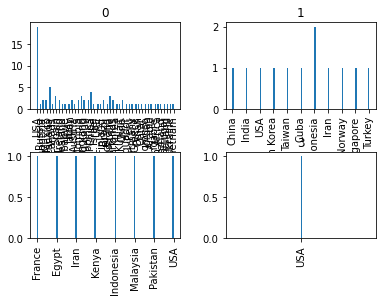

In [11]:
# View histograms of accidents by country
accHistDF.COUNTRY.hist(accHistDF['FATAL ACCIDENTS LAST 20 YRS'], bins=100)

In [12]:
accHistDF.describe()

,AIRLINE,COUNTRY,BEGAN OPERATION,AVERAGE AGE OF FLEET,LAST FATAL ACCIDENT,FATAL ACCIDENTS LAST 10 YRS,FATAL ACCIDENTS LAST 20 YRS,COMMENTS
count,106,106,106,106,106,106,106,106
unique,106,57,59,71,37,3,4,15
top,Air Wisconsin,USA,2016,9.8,none,0,0,
freq,1,22,7,4,45,95,85,92


In [13]:
# # View dataframe data types
# accHistDF.dtypes

In [14]:
# Function converts specified column to numeric
def makeNumeric(col):
    accHistDF[col] = pd.to_numeric(accHistDF[col])

In [15]:
# Create list of columns that should be numeric
numCols = ['AVERAGE AGE OF FLEET', 'FATAL ACCIDENTS LAST 10 YRS', 'FATAL ACCIDENTS LAST 20 YRS']
# Iterate through list, converting columns to numeric
for i in numCols:
    makeNumeric(i)

In [16]:
# # View dataframe data types
# accHistDF.dtypes

In [17]:
# Create column for accidents between 10-20 years ago
accHistDF['FATAL ACCIDENTS 10-20 YRS'] = accHistDF['FATAL ACCIDENTS LAST 20 YRS'] - accHistDF['FATAL ACCIDENTS LAST 10 YRS']

In [18]:
# Save dataframe to CSV
accHistDF.to_csv('data/PCI_scrape_accident-history.csv', index=False)